<a href="https://colab.research.google.com/github/ximeeb/ebertz-gross-lopez-tp-lcs/blob/master/red_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets
!pip install pandas

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.utils import to_categorical
import opendatasets as od
import pandas
import cv2
import os
import matplotlib.pyplot as plt
import json

In [ ]:
od.download("https://www.kaggle.com/datasets/andrewmvd/ocular-disease-recognition-odir5k?select=full_df.csv")

Skipping, found downloaded files in "./ocular-disease-recognition-odir5k" (use force=True to force download)


In [ ]:
# leemos full_df.xlsx a ver qué tiene
full_df = pandas.read_csv('/content/ocular-disease-recognition-odir5k/full_df.csv')

#sacamos las columnas que no nos interesan
raw_data = full_df.drop(columns=['N', 'D', 'G', 'C', 'A', 'H', 'M', 'O', 'labels'])

# print(raw_data.head())  muestra las primeras 5 columnas
raw_data['target'].unique()  #separa los arrays que corresponden a las clases
#raw_data.shape  #tamaño de tabla

# cantidad de elementos y clases. creamos un tensor
targets = np.array(raw_data["target"].apply(lambda x: json.loads(x)).tolist())
targets.shape

In [ ]:
classes = { 0: "Normal",
            1: "Diabetes",
            2: "Glaucoma",
            3: "Cataract",
            4: "Age related Macular Degeneration",
            5: "Hypertension",
            6: "Pathological Myopia",
            7: "Other diseases/abnormalities"
          }

In [ ]:
data = np.sum(targets, axis=0)  #suma la cantidad de elementos por clase

classes_names = list(classes.values())
values = list(data)  #data a list. antes era un tensor

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(classes_names, values, color ='pink',
        width = 0.4)

plt.xlabel("Diagnosis")
plt.ylabel("# of samples")
plt.title("Size of the classes in data set")

plt.xticks(rotation=90)

plt.show()

In [ ]:
#agregamos columna class_name
raw_data["class_name"] = np.argmax(targets, axis=1).tolist()
raw_data["class_name"] = raw_data["class_name"] .replace(classes)

raw_data.head()

In [ ]:
# dejamos las etiquetas limpias segun la imagen
processed_labels = raw_data[["ID", "filename", "class_name", "target"]]

# ver si lo tenemos que guardar en csv
# processed_labels.to_csv('/kaggle/working/labels_clean.csv', index=False)

processed_labels.head()

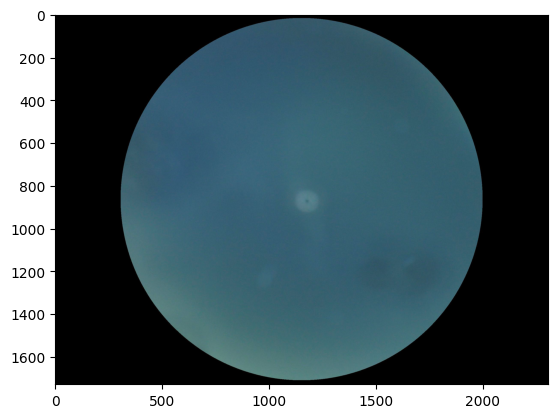

In [124]:
input_images_path = "/content/ocular-disease-recognition-odir5k/ODIR-5K/ODIR-5K/Training Images/0_left.jpg"


training_images = []
ret, training_images = cv2.imreadmulti(mats=training_images,filename=input_images_path,flags=cv2.IMREAD_COLOR)
plt.imshow(training_images[0], aspect=1)